# Tabla de contenido
1. [Introduccción al Proyecto](#Introduccción-al-Proyecto)
2. [Objetivos específicos](#Objetivos-específicos)
3. [Etapas de análisis del proyecto](#Etapas-de-análisis-del-proyecto)
4. [Descargar los datos](#Descargar-los-datos)
5. [Exploración y limpieza de datos (EDA)](#Exploración-y-limpieza-de-datos-(EDA))
6. [Modelado predictivo](#Modelado-predictivo)
7. [Segmentación de clientes mediante clústeres](#Segmentación-de-clientes-mediante-clústeres)
8. [Formulación de estrategias y recomendaciones](#Formulación-de-estrategias-y-recomendaciones)

# Introducción al Proyecto 
La cadena de gimnasios Model Fitness enfrenta un desafío clave: la pérdida de clientes, un fenómeno común en servicios por suscripción como gimnasios. Aunque es posible detectar la cancelación de contratos explícitos, la pérdida no siempre es evidente. Un cliente que deja de asistir durante un mes puede considerarse en riesgo, incluso si no ha cancelado oficialmente su membresía. Para abordar este problema, Model Fitness ha recopilado datos sobre el comportamiento de sus clientes, con el objetivo de desarrollar una estrategia basada en análisis de datos para predecir y reducir la rotación de usuarios, además de mejorar la atención y la interacción con sus clientes.

# Objetivos específicos
**1.Predecir la probabilidad de cancelación:** Diseñar un modelo de clasificación binaria que permita identificar clientes con mayor probabilidad de cancelar su membresía en el próximo mes, basándose en patrones de uso y comportamiento.

**2.Segmentar clientes por características clave:** Crear perfiles de clientes típicos mediante análisis de clústeres, identificando grupos relevantes y analizando los factores que los diferencian, incluyendo su nivel de lealtad o propensión a abandonar el gimnasio.

**3.Identificar factores influyentes en la cancelación:** Analizar qué variables tienen mayor impacto en la pérdida de clientes, como la frecuencia de asistencia, el tiempo restante de contrato, o la participación en actividades grupales, para orientar estrategias de retención.

# Etapas de análisis del proyecto
**Paso 1.Descargar los datos:**
Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía.

**Paso 2.Exploración y limpieza de datos (EDA):**
Observar el dataset, identificando datos faltantes, distribuciones y estadísticos descriptivos (media, desviación estándar, etc.).
Comparar valores promedio entre clientes que cancelaron y los que continuaron, utilizando histogramas y gráficos de barras.
Crear una matriz de correlación para identificar relaciones entre variables clave.

**Paso 3.Modelado predictivo:**
Dividir los datos en conjuntos de entrenamiento y validación.
Entrenar modelos de clasificación binaria utilizando regresión logística y bosques aleatorios, comparando sus métricas de desempeño (precisión, recall y exactitud).Seleccionar el modelo con mejores resultados para predecir la probabilidad de cancelación.

**Paso 4.Segmentación de clientes mediante clústeres:**
Estandarizar las variables relevantes y crear un dendrograma para determinar el número óptimo de clústeres.
Utilizar el algoritmo K-means (n=5) para segmentar a los clientes y analizar los valores promedio de cada grupo.
Identificar características predominantes en cada clúster y calcular su tasa de cancelación, destacando los grupos más leales y los más propensos a abandonar.

**Paso 5. Formulación de estrategias y recomendaciones:**
Basándose en los resultados del análisis, identificar patrones relevantes como grupos de alto riesgo y factores determinantes de cancelación.
Proponer acciones específicas de retención, como descuentos personalizados, promoción de actividades grupales, o comunicación proactiva con clientes inactivos.Establecer una estrategia de marketing basada en datos para mejorar la experiencia del cliente y reducir la rotación.

# Descargar los datos

**Inicialización**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


**Cargar los datos**

In [2]:
data_gym = pd.read_csv('gym_churn_us.csv')

# Exploración y limpieza de datos (EDA)

In [3]:
data_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
data_gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data_gym.columns = data_gym.columns.str.lower()

In [6]:
data_gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [7]:
data_gym.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [8]:
data_gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
mean_values = data_gym.groupby('churn').mean()

In [10]:
print("Valores medios por grupo de Churn:")
print(mean_values)

Valores medios por grupo de Churn:
         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     


Churn = 0: Clientes que no cancelaron.
Churn = 1: Clientes que cancelaron.

In [11]:
clientes_no_cancelaron = data_gym[data_gym['churn'] == 0]
clientes_cancelaron = data_gym[data_gym['churn'] == 1]

Elegí graficar las características relevantes

In [12]:
columns_to_plot = ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'age', 'group_visits',
                   'lifetime', 'contract_period', 'avg_class_frequency_total']


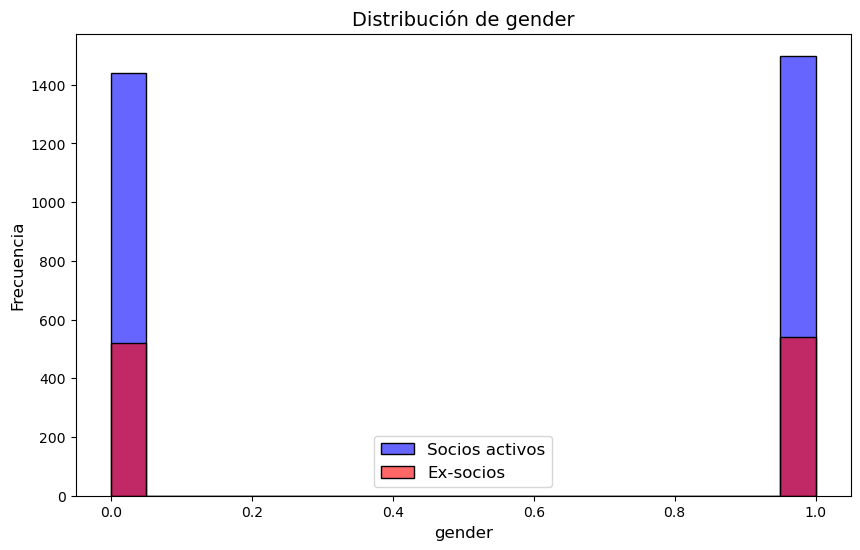

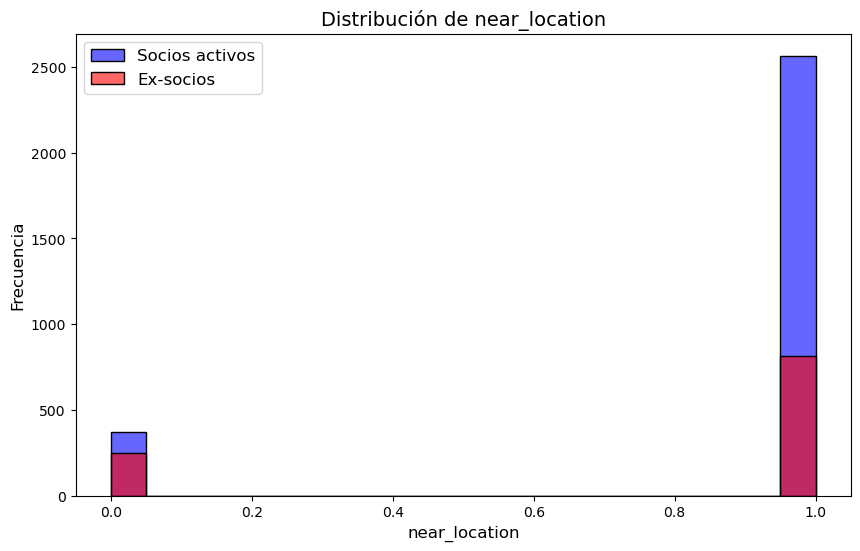

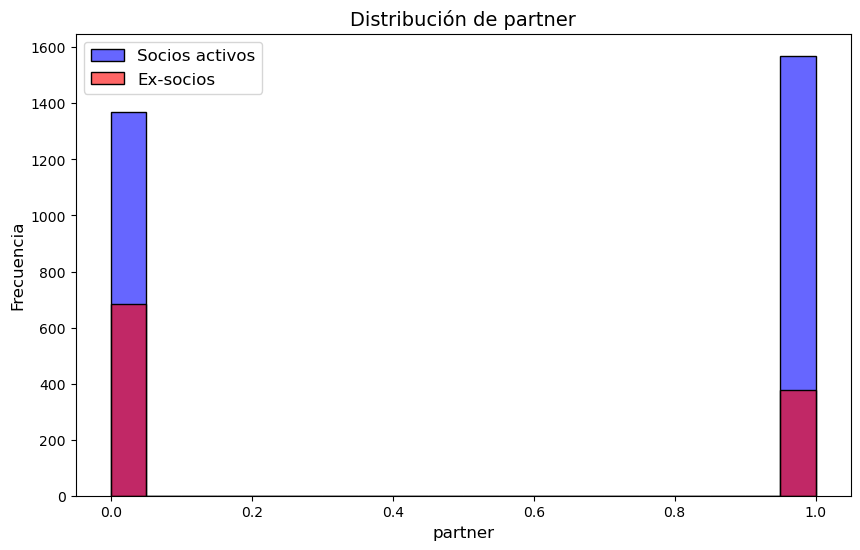

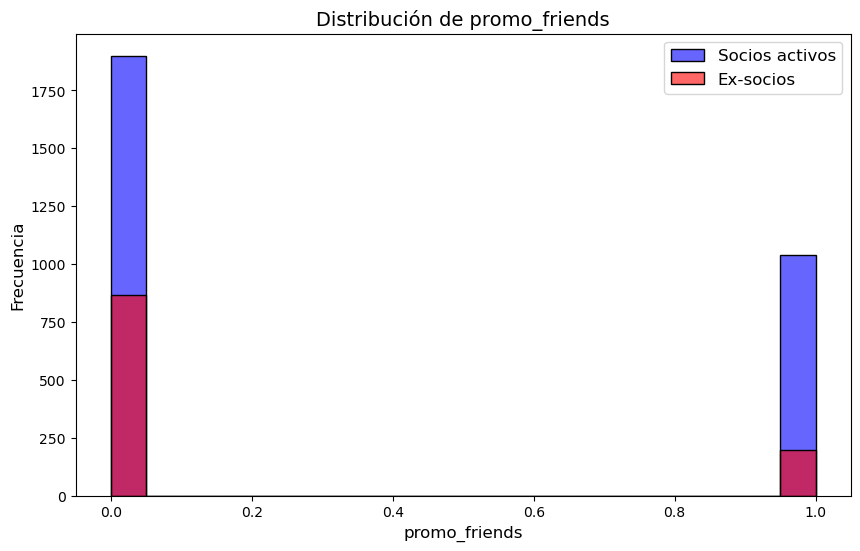

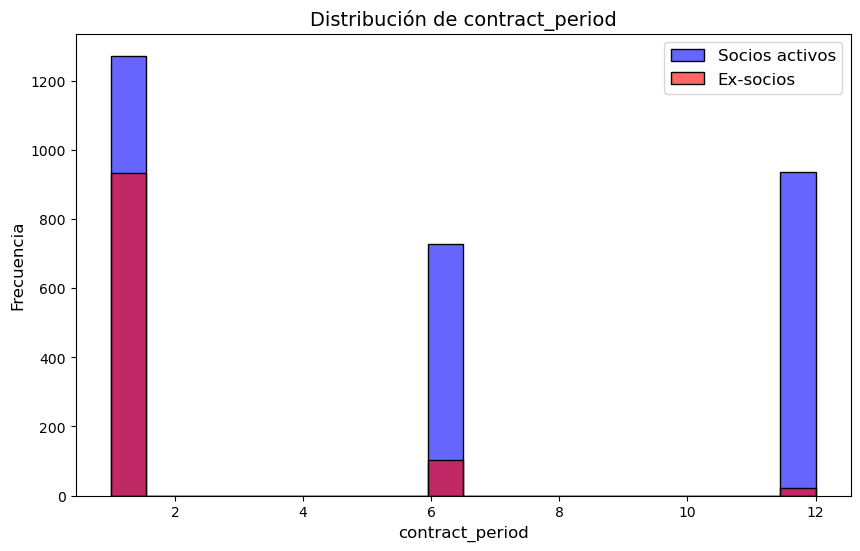

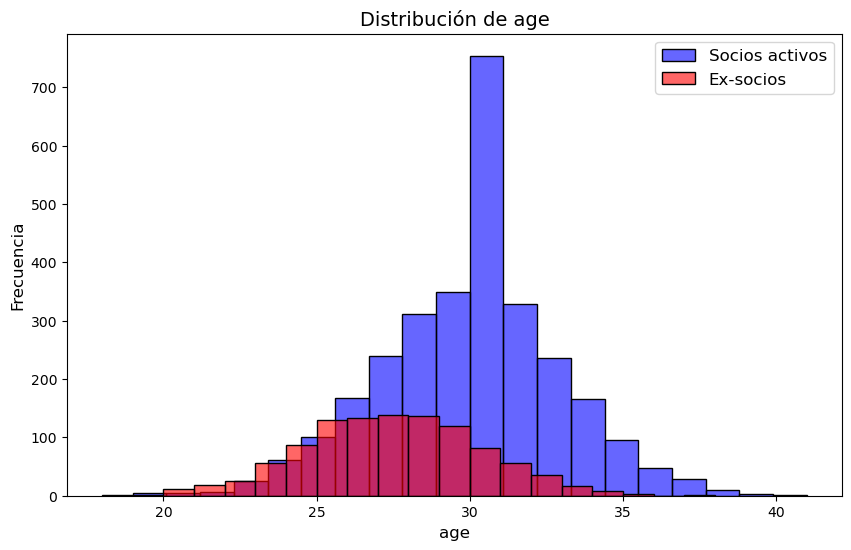

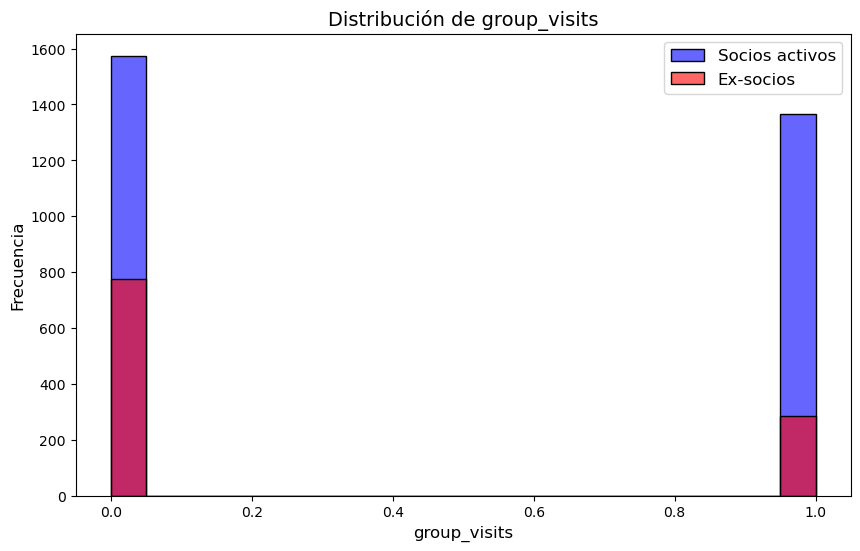

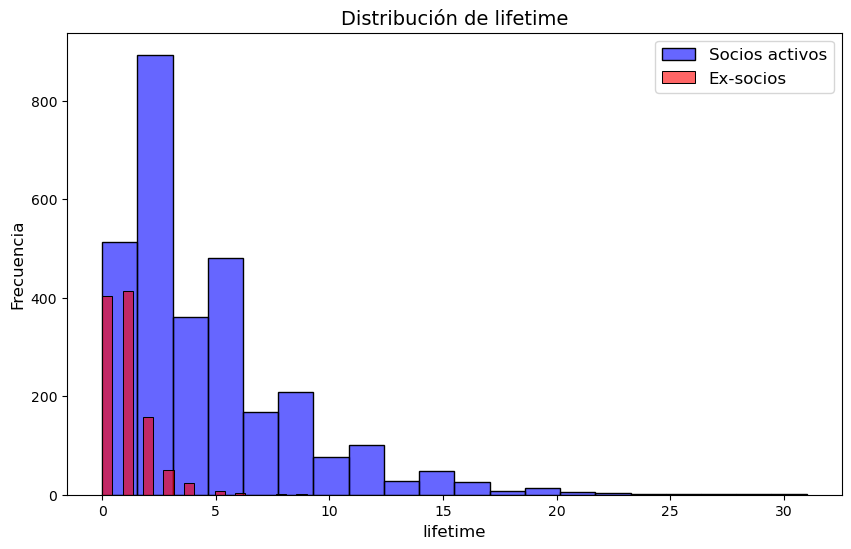

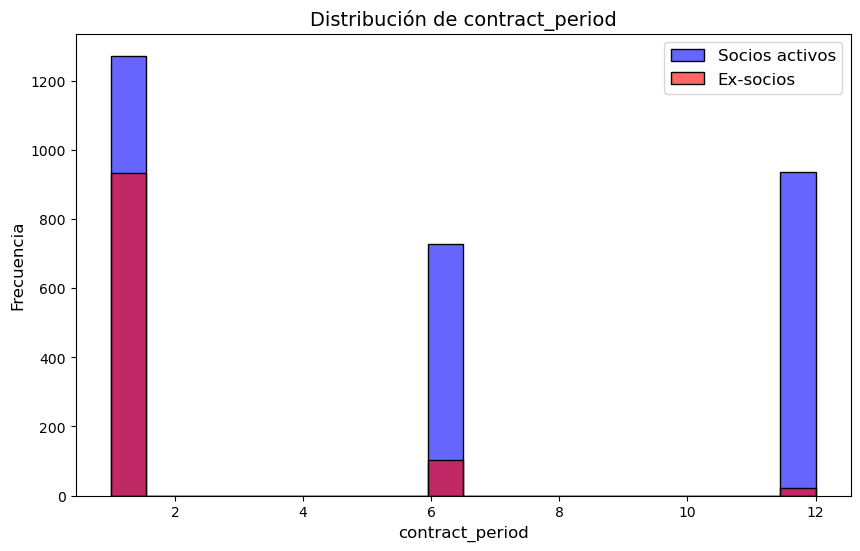

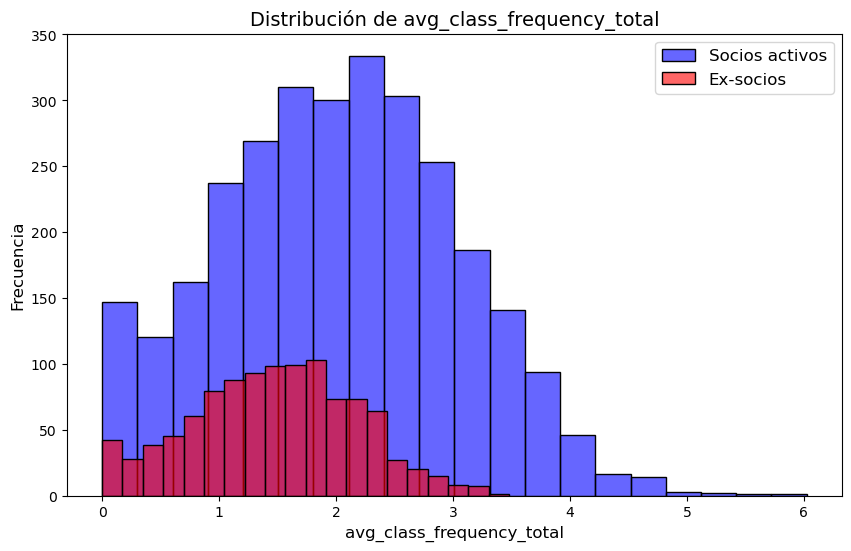

In [13]:
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(clientes_no_cancelaron[column], kde=False, color='blue', label='Socios activos', bins=20, alpha=0.6)
    sns.histplot(clientes_cancelaron[column], kde=False, color='red', label='Ex-socios', bins=20, alpha=0.6)
    plt.title(f'Distribución de {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

Matriz de correlación

In [14]:
print(data_gym.corr())

                                     gender  near_location   partner  \
gender                             1.000000       0.006699 -0.010463   
near_location                      0.006699       1.000000 -0.005119   
partner                           -0.010463      -0.005119  1.000000   
promo_friends                     -0.005033       0.210964  0.451960   
phone                             -0.008542      -0.015763  0.009970   
contract_period                    0.000502       0.150233  0.306166   
group_visits                       0.017879       0.154728  0.022710   
age                                0.013807       0.058358  0.047480   
avg_additional_charges_total      -0.009334       0.040761  0.022941   
month_to_end_contract             -0.001281       0.143961  0.294632   
lifetime                           0.013579       0.070921  0.061229   
avg_class_frequency_total          0.014620       0.043127  0.024938   
avg_class_frequency_current_month  0.009156       0.062664  0.04

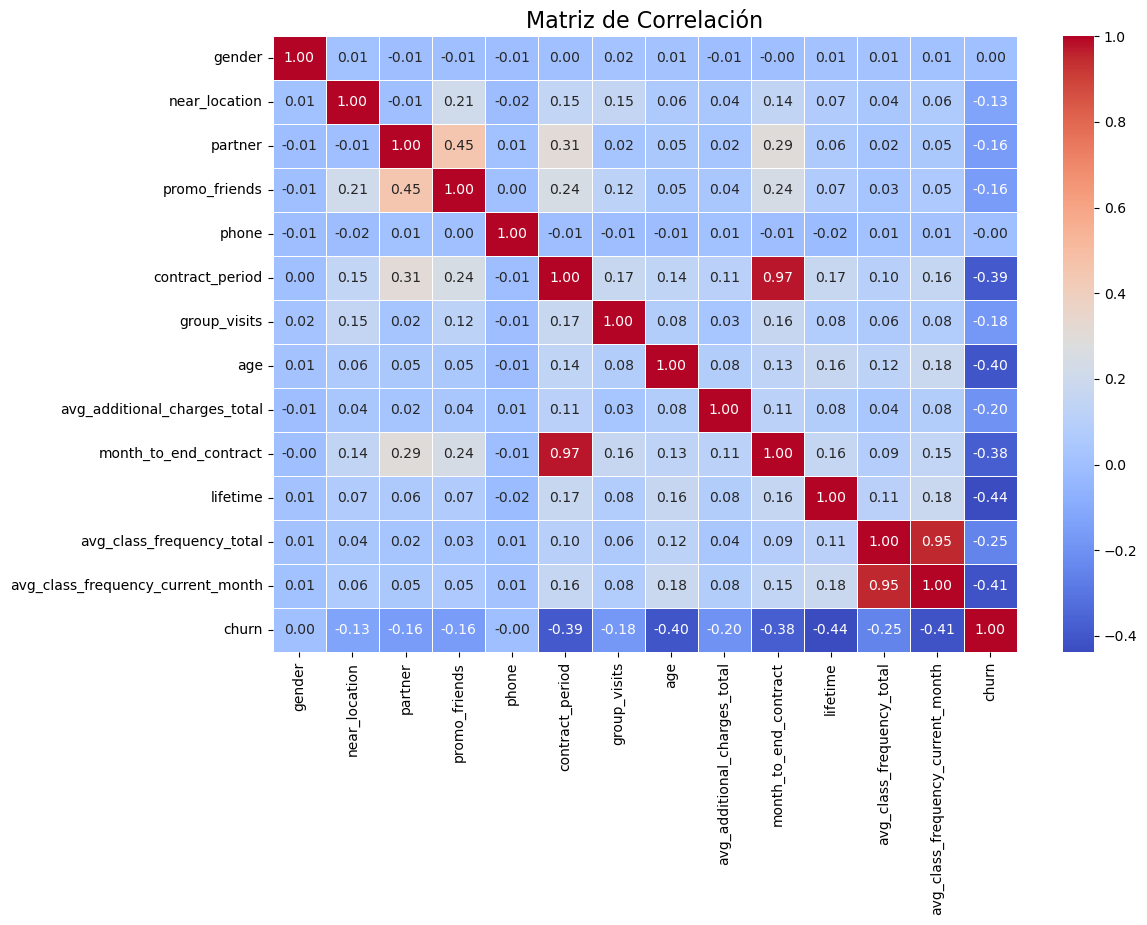

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_gym.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

Observaciones de la matriz de correlación:

**Relación de churn con otras variables**
lifetime: Correlación negativa significativa (-0.438). Esto indica que los clientes que han estado más tiempo en el gimnasio tienen menos probabilidades de cancelar.
avg_class_frequency_current_month: Correlación negativa moderada (-0.412). Los clientes que asisten más frecuentemente este mes tienen menos probabilidades de cancelar.
contract_period: Correlación negativa moderada (-0.390). Los contratos más largos están asociados con menores tasas de cancelación.
month_to_end_contract: Correlación negativa moderada (-0.381). A medida que el contrato se acerca a su final, es más probable que el cliente cancele.
age: Correlación negativa moderada (-0.405). Clientes más jóvenes son más propensos a cancelar.
group_visits: Correlación negativa débil (-0.175). Participar en actividades grupales tiene un pequeño efecto protector contra la cancelación.
promo_friends: Correlación negativa débil (-0.162). Las promociones “trae a un amigo” reducen levemente la cancelación.
avg_additional_charges_total: Correlación negativa débil (-0.199). Clientes que gastan más en servicios adicionales tienen menos probabilidad de cancelar.

**Correlaciones altas entre otras variables**
contract_period y month_to_end_contract: Correlación muy alta (0.973). Esto es esperado, ya que los meses restantes del contrato dependen directamente de su duración.
avg_class_frequency_total y avg_class_frequency_current_month: Correlación muy alta (0.953). Los patrones de asistencia general y del último mes suelen ser consistentes.

**Variables demográficas (género y edad)**
gender: Tiene correlaciones cercanas a 0 con casi todas las variables, indicando que no tiene un impacto significativo en el comportamiento de los clientes.
age: Correlaciona débilmente con varias características como lifetime (0.165) y avg_class_frequency_current_month (0.183). Esto sugiere que los clientes mayores tienden a asistir más frecuentemente y permanecen más tiempo en el gimnasio.

**Relaciones débiles**
Muchas características tienen correlaciones débiles (cercanas a 0) con churn, como partner, phone, o near_location. Esto implica que estas variables tienen un impacto limitado en la cancelación.

# Modelado predictivo

In [16]:
X = data_gym.drop(columns=["churn"])  
y = data_gym["churn"] 

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 1 Regresión logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)  
y_pred_log = log_reg.predict(X_valid) 

In [19]:
# 2 Bosque aleatorio
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)  
y_pred_rf = rf_clf.predict(X_valid)  


In [20]:
models = {"Regresión Logística": y_pred_log, "Bosque Aleatorio": y_pred_rf}
for model_name, y_pred in models.items():
    print(f"Resultados para {model_name}:")
    print(f"- Accuracy: {accuracy_score(y_valid, y_pred):.2f}")
    print(f"- Precision: {precision_score(y_valid, y_pred):.2f}")
    print(f"- Recall: {recall_score(y_valid, y_pred):.2f}")
    print("Reporte de clasificación:")
    print(classification_report(y_valid, y_pred))
    print("-" * 50)

Resultados para Regresión Logística:
- Accuracy: 0.92
- Precision: 0.87
- Recall: 0.78
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       598
           1       0.87      0.78      0.83       202

    accuracy                           0.92       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.91      0.92      0.91       800

--------------------------------------------------
Resultados para Bosque Aleatorio:
- Accuracy: 0.91
- Precision: 0.85
- Recall: 0.78
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.85      0.78      0.81       202

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800

--------------------------------------------------


**Regresión Logística:**

**Exactitud (Accuracy):**
El modelo tiene una precisión general del 92%, lo que significa que el 92% de las predicciones (clientes que se quedaron o se fueron) fueron correctas.

**Precisión (Precision):**
Para los clientes que se fueron (clase 1), la precisión es del 87%, lo que significa que el modelo identificó correctamente el 87% de las predicciones positivas (predicciones de pérdida que realmente ocurrieron).Una precisión más alta reduce los falsos positivos (clientes que se predicen como perdidos pero realmente no lo están).

**Recall:**
Para los clientes que se fueron, el recall es del 78%, lo que indica que el modelo identificó correctamente el 78% de los clientes que realmente cancelaron.Un recall más bajo puede ser crítico porque significa que el 22% de los clientes que se perdieron no fueron identificados.

**Reporte de clasificación:**
La clase 0 (clientes que se quedaron) tiene métricas más altas (precision, recall y f1-score), lo cual es esperable ya que suele haber más clientes que permanecen en el gimnasio.

**Bosque Aleatorio:**

**Exactitud (Accuracy):**
El modelo tiene una precisión general del 91%, ligeramente inferior a la regresión logística, pero sigue siendo robusta.

**Precisión (Precision):**
Para la clase 1 (clientes que se fueron), la precisión es del 85%, lo que significa que el modelo identificó correctamente un porcentaje menor de predicciones positivas en comparación con la regresión logística.

**Recall:**
Para los clientes que se fueron, el recall es del 78%, igual que el modelo de regresión logística.
Reporte de clasificación:

Similar al modelo de regresión logística, el desempeño para la clase 0 es superior al de la clase 1.

**Comparación entre los modelos:**
Ambos modelos tienen métricas similares:
Accuracy: Regresión Logística (92%) vs. Bosque Aleatorio (91%).
Precision y Recall para la clase 1 son casi iguales en ambos modelos.

Ventajas de Regresión Logística:
Tiene una precisión ligeramente superior para la clase 1 (clientes que se fueron), lo que reduce los falsos positivos. Es más interpretable, lo cual puede ser importante para comunicar resultados.

Ventajas de Bosque Aleatorio:
Puede manejar relaciones no lineales entre las características, lo que podría ser útil si los datos tienen complejidad.

**Conclusión:**
Ambos modelos son efectivos, pero la regresión logística es ligeramente superior en este caso, debido a su mayor precisión y desempeño general.

# Segmentación de clientes mediante clústeres

Estandarización de los datos

In [21]:
X = data_gym.drop(columns=['churn'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Crear el dendrograma

In [22]:
linked = linkage(X_scaled, method='ward')

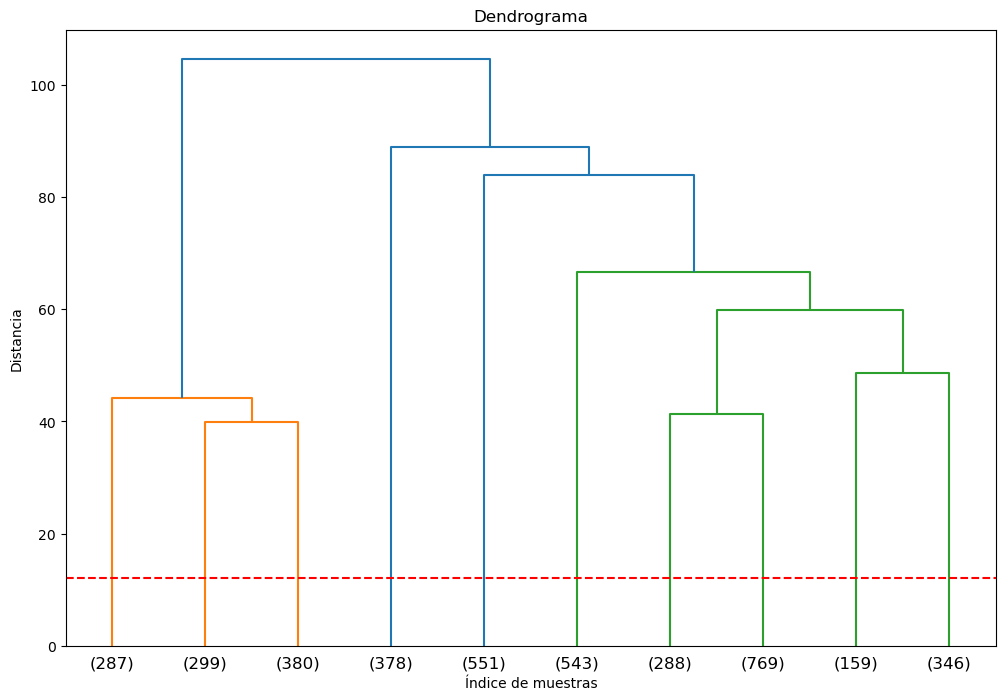

In [23]:
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=10)  # Trunca para 10 grupos
plt.title("Dendrograma")
plt.xlabel("Índice de muestras")
plt.ylabel("Distancia")
plt.axhline(y=12, color='r', linestyle='--')  # Línea guía para número de clústeres (ajusta según visualización)
plt.show()

K-means Clustering

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [25]:
data_gym['cluster'] = clusters

Valores medios de características por clúster

In [26]:
cluster_means = data_gym.groupby('cluster').mean()
print(cluster_means)

           gender  near_location   partner  promo_friends     phone  \
cluster                                                               
0        0.484801       0.698363  0.301637       0.007015  0.899454   
1        0.494471       0.947867  0.791469       0.998420  0.906793   
2        0.464396       0.913313  0.766254       0.493808  0.925697   
3        0.547794       0.937500  0.742647       0.424632  0.863971   
4        0.568233       0.878076  0.178971       0.048098  0.914989   

         contract_period  group_visits        age  \
cluster                                             
0               1.733437      0.255651  28.074825   
1               2.740916      0.431280  28.903633   
2              10.495356      0.506192  30.091331   
3              11.194853      0.575368  29.720588   
4               2.120805      0.456376  29.993289   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                                 

Observaciones

Comparaciones 

**Frecuencia de clases y compromiso:**

Los clústeres 2 y 4 tienen las frecuencias de clase más altas, lo que indica un mayor compromiso con los servicios regulares del gimnasio.
El clúster 3 tiene una baja frecuencia de visitas, pero su alta inversión en servicios adicionales sugiere otro tipo de valor.

**Red social y retención:**

Los clústeres con alta proporción de parejas y amigos en promoción (1 y 2) tienen tasas de cancelación más bajas, lo que sugiere que la red social ayuda a retener clientes.

**Contratos y cancelación:**

Los contratos más largos (clústeres 2 y 3) están asociados con tasas de cancelación más bajas.
Contratos cortos (clústeres 0 y 4) están asociados con tasas de cancelación más altas.

**Gastos adicionales:**

Los clústeres con altos gastos adicionales (2, 3 y 4) tienden a tener menores tasas de cancelación, indicando que estos usuarios ven valor en los servicios complementarios.


Distribuciones de características por clúster

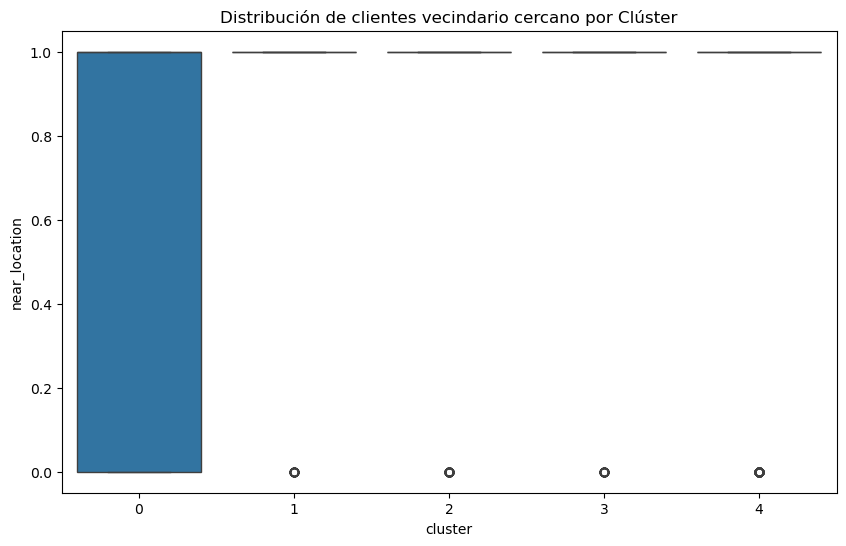

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_gym, x='cluster', y='near_location')
plt.title("Distribución de clientes vecindario cercano por Clúster")
plt.show()

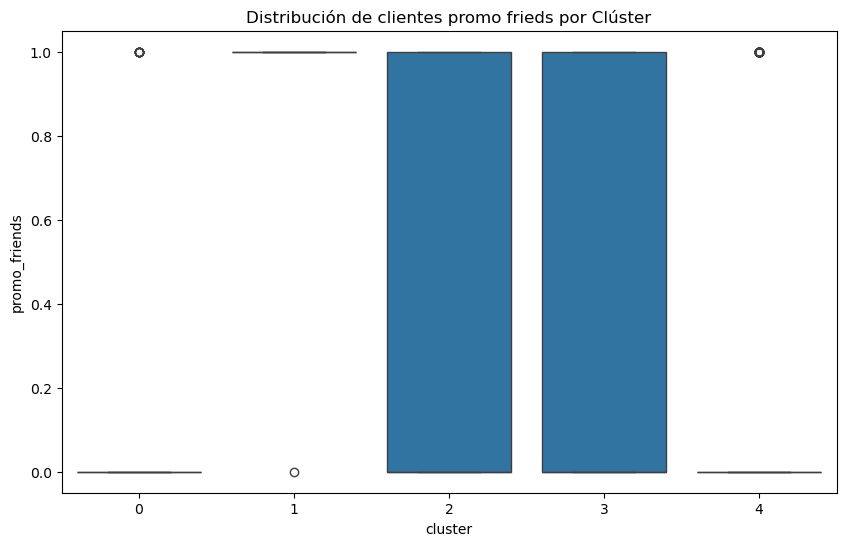

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_gym, x='cluster', y='promo_friends')
plt.title("Distribución de clientes promo frieds por Clúster")
plt.show()

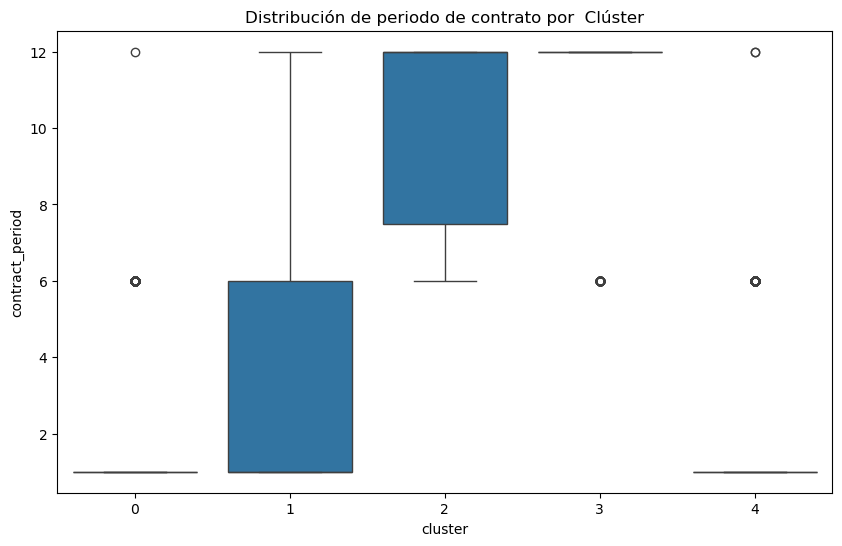

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_gym, x='cluster', y='contract_period')
plt.title("Distribución de periodo de contrato por  Clúster")
plt.show()

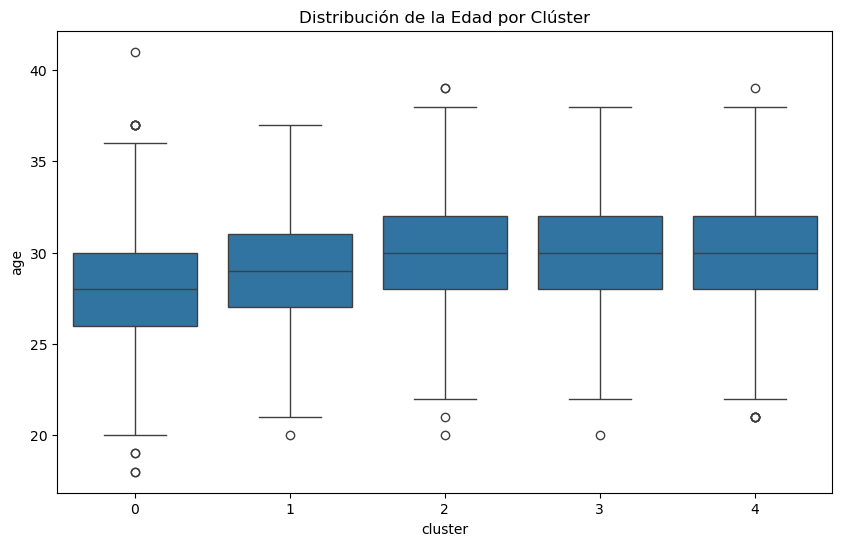

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_gym, x='cluster', y='age')
plt.title("Distribución de la Edad por Clúster")
plt.show()

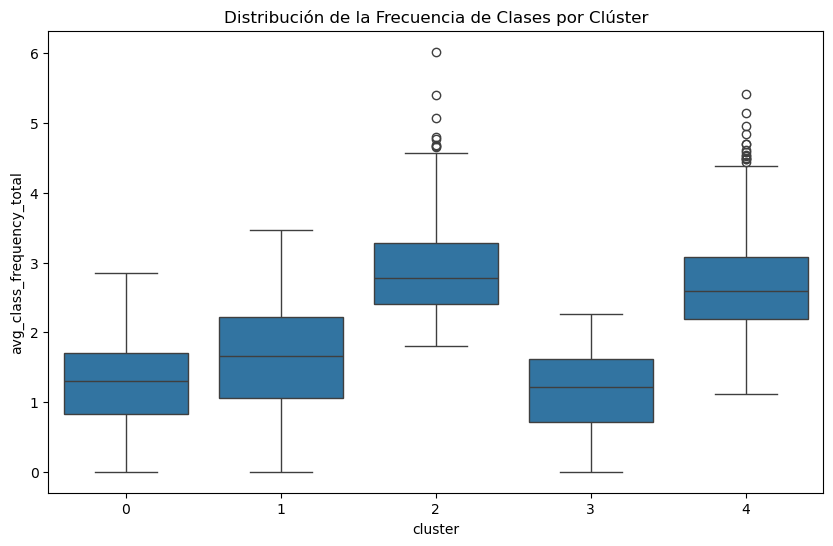

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_gym, x='cluster', y='avg_class_frequency_total')
plt.title("Distribución de la Frecuencia de Clases por Clúster")
plt.show()

Tasa de cancelación por clúster

In [32]:
churn_rate = data_gym.groupby('cluster')['churn'].mean()
print("Tasa de cancelación por clúster:")
print(churn_rate)

Tasa de cancelación por clúster:
cluster
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: churn, dtype: float64


**Observaciones**

**Cluster 0 (Tasa de cancelación: 58.77%)**

Características generales:
Baja proporción de socios/as con pareja (30%) y amigos/as que usan la promoción (0.7%).
Contratos cortos (contract_period de ~ 1.7 meses) y menor frecuencia de visitas a clases (~ 1.25 total y ~ 0.99 en el mes actual).
Gastos adicionales más bajos en promedio ($127).
Mayor tasa de cancelación (59%).
Perfil: Este grupo representa clientes menos comprometidos con el gimnasio. Su menor inversión de tiempo y dinero, junto con una baja red social asociada (amigos y pareja), sugiere una baja fidelidad.

**Cluster 1 (Tasa de cancelación: 28.59%)**

Características generales:
Alta proporción de socios/as con pareja (79%) y amigos/as con promoción (~ 99.8%).
Contratos medianos (contract_period de ~ 2.7 meses).
Frecuencia de visitas moderada (~ 1.6 total y ~ 1.48 en el mes actual).
Gastos adicionales algo mayores ($139).
Perfil: Este grupo incluye clientes que están moderadamente comprometidos, probablemente influenciados por su red social (parejas y amigos). Aunque la tasa de cancelación es menor que en el clúster 0, aún es significativa.

**Cluster 2 (Tasa de cancelación: 1.39%)**

Características generales:
Clientes con contratos largos (contract_period de ~ 10.5 meses).
Alta frecuencia de visitas (~ 2.88 total y mensual), y los mayores gastos adicionales promedio ($164).
Muy baja tasa de cancelación (1.39%).
Perfil: Este grupo representa los clientes más leales y comprometidos. Son quienes probablemente están satisfechos con el servicio, tienen hábitos consistentes de uso y ven valor en los servicios adicionales.

**Cluster 3 (Tasa de cancelación: 4.23%)**

Características generales:
Contratos largos (~ 11.2 meses), pero con baja frecuencia de visitas (~ 1.15 total).
Gastos adicionales elevados ($167), pero menor compromiso con clases.
Muy baja tasa de cancelación (4.23%).
Perfil: Este grupo incluye clientes fieles, pero que no usan el gimnasio intensivamente. Puede tratarse de clientes que prefieren servicios complementarios o simplemente no priorizan clases regulares.

**Cluster 4 (Tasa de cancelación: 10.51%)**

Características generales:
Contratos más cortos (~ 2.1 meses), aunque con frecuencia de visitas elevada (~ 2.67).
Gastos adicionales altos ($155).
Tasa de cancelación baja-moderada (10.51%).
Perfil: Este grupo incluye usuarios que participan activamente durante períodos cortos, lo que puede indicar clientes con intereses temporales (como alcanzar una meta específica o promociones).

**Conclusiones generales**

**Clusters con altas tasas de cancelación (0 y 1):**

El clúster 0 (59%) tiene los clientes más propensos a abandonar. Su perfil muestra baja participación y compromiso.
El clúster 1 (28%) muestra mayor compromiso, pero aún incluye un número considerable de cancelaciones.

**Clusters leales (2 y 3):**

Clúster 2 (1.39%) y clúster 3 (4.23%) representan los usuarios más leales y comprometidos.
Los contratos largos y el uso frecuente del gimnasio (clúster 2) o un interés en servicios adicionales (clúster 3) parecen ser buenos indicadores de fidelidad.

**Cluster 4:**

Este grupo tiene una dinámica interesante: alta actividad durante períodos cortos. Podrían ser usuarios en transición o con objetivos específicos.



# Formulación de estrategias y recomendaciones

A lo largo de este análisis, hemos utilizado técnicas de clasificación binaria y agrupamiento para entender mejor las características, comportamiento y patrones de cancelación de los clientes del gimnasio.

**Fase 1: Modelo de Clasificación Binaria**

Modelos probados: Regresión Logística y Bosque Aleatorio.
Ambos modelos lograron métricas sólidas, con la regresión logística destacando ligeramente en precisión y exactitud.
Hallazgo principal: Las características más importantes para predecir la cancelación incluyen la duración del contrato, la frecuencia de clases, y el tiempo restante en el contrato.

**Fase 2: Clustering de Clientes**

Se identificaron cinco clústeres distintos en la base de clientes, cada uno con características y tasas de cancelación específicas:
Clúster 0: Alta tasa de cancelación (58.8%), con clientes menos comprometidos y contratos cortos.
Clúster 1: Moderada tasa de cancelación (28.6%), con fuerte conexión social y moderada actividad.
Clúster 2: Baja tasa de cancelación (1.39%), clientes altamente comprometidos con contratos largos y alta frecuencia de clases.
Clúster 3: Tasa baja (4.23%), aunque con menor actividad, invierten en servicios adicionales y tienen contratos largos.
Clúster 4: Tasa moderada (10.5%), clientes activos con contratos cortos.

**Hallazgos clave**

Frecuencia de clases y duración de contrato son indicadores fuertes de compromiso y lealtad.
Las conexiones sociales (tener pareja o amigos en promoción) están relacionadas con menores tasas de cancelación.
La inversión en servicios adicionales (como programas premium) ayuda a retener clientes, incluso cuando la frecuencia de uso es baja.

**Recomendaciones Estratégicas**

**1. Estrategias de Retención para Clústeres Propensos a Cancelar (0 y 1)**

Clúster 0 (Clientes poco comprometidos):
Ofrecer promociones personalizadas para renovar contratos más largos.
Incrementar la interacción social mediante clases grupales y actividades especiales.
Introducir campañas informativas para resaltar beneficios del gimnasio a largo plazo.
Clúster 1 (Clientes conectados socialmente pero con riesgo moderado):
Incentivar la permanencia mediante descuentos en contratos más largos para ellos y sus amigos.
Fortalecer el aspecto social con eventos exclusivos para miembros con parejas/amigos.

**2. Estrategias para Mantener a Clientes Leales (Clústeres 2, 3 y 4)**

Clúster 2 (Clientes más comprometidos):
Ofrecer programas de fidelización, como recompensas basadas en asistencia regular.
Crear encuestas regulares para recopilar opiniones y adaptar los servicios.
Clúster 3 (Clientes de alta inversión pero baja actividad):
Diseñar programas personalizados enfocados en servicios adicionales.
Ofrecer actividades no físicas, como talleres de bienestar o nutrición, para complementar sus intereses.
Clúster 4 (Clientes activos pero de contratos cortos):
Incentivar contratos más largos ofreciendo tarifas reducidas o beneficios exclusivos.
Mantener alta la frecuencia de clases mediante desafíos mensuales o planes específicos de entrenamiento.

**3. General**

Introducir un sistema de seguimiento automatizado para identificar patrones tempranos de cancelación (baja frecuencia de visitas, finalización inminente del contrato, etc.).
Personalizar las interacciones con base en el clúster del cliente, utilizando mensajes y promociones relevantes.
Analizar más profundamente los factores asociados a los clientes del Clúster 0, ya que representan el mayor desafío en términos de retención.

**Impacto Esperado**

Implementar estas estrategias permitirá al gimnasio:

Reducir las tasas de cancelación, especialmente en los clústeres con mayor riesgo.
Maximizar el valor de los clientes leales mediante programas específicos.
Aumentar el compromiso general y mejorar la experiencia del cliente, fortaleciendo la sostenibilidad del negocio.